# Hospital Reviews Topic Modelling and Sentiment Analysis

## 1. Dataset Overview

Hospital Reviews Dataset - https://www.kaggle.com/datasets/junaid6731/hospital-reviews-dataset

For this project, the **"Hospital Reviews Dataset"** sourced from Kaggle was selected. It contains 996 sentiment-labelled reviews collected from **Google Maps** for various hospitals located in **Bengaluru, India**. The reviews reflect genuine patient and family experiences with hospital services, covering themes such as staff conduct, facility quality, and treatment outcomes. The format of these **Google Maps** reviews feature both written feedback and a 1–5 rating scale.

This dataset is highly appropriate for the task, as it supports both **topic modeling** to uncover broad areas of concern, and **sentiment analysis** to assess the overall emotional tone of feedback.

### Data Types

* **Feedback**: plain-text field capturing unstructured customer reviews. This is the main input for both topic modeling (LDA) and sentiment classification.
* **Sentiment Label**: A binary categorical variable (0 = Negative, 1 = Positive), ideal for training and evaluating supervised classification models.
* **Ratings**: A numerical variable on a 1-5 scale representing customer ratings.

### Data Quality and Common Pitfalls

* The dataset is well-structured, with clear and relevant column headings.
* **An extra unnamed column** with no data was found and will be dropped during cleaning.
* The dataset may contain some duplicated records which will be removed before processing.
* The **Feedback** will need to be cleaned using standard NLP preprocessing steps: lowercasing, punctuation removal, tokenisation, stopword filtering, and lemmatisation.
* Potential limitations include **sentiment imbalance**, which may require consideration during model training and evaluation.

---

## 2. Choice of Models

### Using LDA in Topic Modelling

Latent Dirichlet Allocation (LDA) is a popular unsupervised machine learning model that helps find hidden themes in large collections of text (Blei, Ng and Jordan, 2003). It works well for topic modeling because it treats each document as a mix of different topics, and each topic as a group of related words, making it possible to identify clear and meaningful topics without needing any labelled data (Blei, Ng and Jordan, 2003). When compared to other methods like Non-negative Matrix Factorization (NMF) or clustering algorithms, LDA has a strong mathematical base using Bayesian statistics, which often gives more reliable and interpretable results (Egger and Yu, 2022). LDA is also good at handling large and sparse document-term matrices, which makes it a practical choice for analysing hospital reviews that include a wide range of topics and overlapping themes (Byteplus, 2025). Because LDA is widely used in academic research, it is easy to validate and compare results, making it a suitable tool for understanding patient experiences and concerns in text data (Blei, Ng and Jordan, 2003).

### Using XGBoost in Sentiment Analysis

XGBoost is a fast and reliable gradient boosting model that performs well in many classification tasks, including sentiment analysis, because of its strong prediction accuracy, flexibility, and ability to work with different types of data (Saiwa, 2024). In this project, XGBoost is a good fit because it can use both TF-IDF text features and numeric ratings, helping it learn complex patterns in the data (Saiwa, 2024). Compared to simpler models like logistic regression, XGBoost often gives better results by combining many small decision trees and improving them during training (Chen and Guestrin, 2016). Although deep learning models like recurrent neural networks or transformers are also common for analysing text, they usually need more data and computing power (Goodfellow, Bengio and Courville, 2016). For this dataset, XGBoost provides a good balance between performance and complexity, offering strong sentiment prediction without requiring too many resources (Chen and Guestrin, 2016). Its support for handling imbalanced datasets through the `scale_pos_weight` parameter also makes it well suited for this kind of task (Brownlee, 2020).

---

## 3. Analysis Plan

#### a. Exploratory Data Analysis (EDA) Plan

| **Steps**| **Purpose**|
|-|-|
| **Load and Inspect Data**                     | Check dataset size, column types, and overview of text data (e.g., feedback reviews, sentiment labels).                           |
| **Summary Statistics**                        | Explore text length distribution, number of unique words, and class distribution of sentiment labels.                             |
| **Check for Duplicates and Missing Values**   | Clean data by removing incomplete records.                                                                                        |
| **Text Cleaning and Preprocessing**           | Clean text by removing punctuation, stopwords, lowercasing, tokenisation, and stemming/lemmatisation to prepare for analysis.     |
| **Visual Inspection**                         | Use word clouds of common words to get initial insights into the data, and histograms to understand sentiment and ratings balance.|

#### b. Topic Modelling Plan

| **Steps**| **Reason**|
|-|-|
| **Use cleaned Feedback as input for LDA** (Feature selection for Topic Modelling)| Identify broad themes and main areas of concern in customer feedback without supervision. |
| **Convert text to document-term matrix** (DTM via CountVectoriser)               | Necessary input format for LDA algorithm.                                                 |
| **Select number of topics**                                                      | Helps to meaningfully separate feedback into distinct topics.                             |
| **Run LDA model**                                                                | Extract latent topics to reveal broad areas customers talk about.                         |
| **Interpret topics via top words and label topics**                              | Understand what each topic represents in terms of customer concerns.                      |

#### c. Sentiment Analysis Plan

| **Steps**| **Reason**|
|-|-|
| **Use cleaned ‘Feedback’ and ‘Sentiment Label’ columns** (Feature selection for Sentiment Analysis)   | Supervised learning to classify customer sentiment as positive or negative. |
| **Split data into training and test sets**                                                            | To train the model and evaluate performance on unseen data.                 |
| **Train classification model** (XGBoost)                                                              | Suitable for binary sentiment classification based on text features.        |
| **Convert text to features** using TF-IDF                                                             | Transforms text into numeric vectors for the model.                         |
| **Evaluate model using metrics like accuracy, precision, recall, F1-score, and ROC AUC**              | To measure how well the model identifies sentiment correctly.               |

#### d. Model Evaluation/Results Interpretation Plan

| **Steps**| **Reason**|
|-|-|
| **Analyse LDA topics** to identify main customer concern areas                   | Helps the medical aid understand what issues come up most often.                            |
| **Aggregate sentiment scores per topic or overall**                              | Provides a sense of customer satisfaction or dissatisfaction related to different concerns. |
| **Visualise topics and sentiment distributions** (e.g., bar charts, word clouds) | Makes findings clear and accessible to stakeholders.                                        |
| **Summarise key insights and actionable recommendations**                        | Translate analysis into business value and potential improvements.                          |

#### e. Report Writing Plan

| **Section**| **Content**|
|-|-|
| **1. Introduction**              | Purpose of text analysis task, business context (improving medical aid customer experience). |
| **2. Dataset Overview**          | Describe dataset source, size, structure (reviews, labels, ratings).                         |
| **3. EDA Summary**               | Data cleaning steps, text characteristics, and sentiment distribution.                       |
| **4. Topic Modelling**           | LDA setup, number of topics chosen, interpretation of themes.                                |
| **5. Sentiment Analysis**        | Model training process, chosen methods, evaluation results.                                  |
| **6. Results and Insights**      | Key topics, sentiment trends, and what they reveal about customer concerns.                  |
| **7. Recommendations**           | How findings can help improve customer service and address issues.                           |
| **8. Limitations & Future Work** | Discuss data limitations, model assumptions, and opportunities for deeper analysis.          |

---

## 4. Conducting the Analysis
### **a. Exploratory Data Analysis**

In [17]:
import pandas as pd

# Load and Inspect Data
df = pd.read_csv('hospital.csv')

df.head()

,Feedback,Sentiment Label,Ratings,Unnamed: 3
0,Good and clean hospital. There is great team o...,1,5,NaN
1,Had a really bad experience during discharge. ...,1,5,NaN
2,I have visited to take my second dose and Proc...,1,4,NaN
3,That person was slightly clueless and offered...,1,3,NaN
4,There is great team of doctors and good OT fac...,0,1,NaN


In [ ]:
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 3'], errors='ignore')
df.head()


,Feedback,Sentiment Label,Ratings
0,Good and clean hospital. There is great team o...,1,5
1,Had a really bad experience during discharge. ...,1,5
2,I have visited to take my second dose and Proc...,1,4
3,That person was slightly clueless and offered...,1,3
4,There is great team of doctors and good OT fac...,0,1


#### Dropped extra unnamed field

An extra unnamed column (Unnamed: 3) was present in the dataset and has been removed.

In [19]:
# View shape of dataset and column types
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)

# View summary statistics of dataset
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (996, 3)

Column types:
 Feedback           object
Sentiment Label     int64
Ratings             int64
dtype: object

Summary Statistics:
        Sentiment Label     Ratings
count       996.000000  996.000000
mean          0.730924    3.567269
std           0.443703    1.408693
min           0.000000    1.000000
25%           0.000000    2.000000
50%           1.000000    4.000000
75%           1.000000    5.000000
max           1.000000    5.000000


#### Summary Statistics 

The dataset contains 996 records across three columns: Feedback (text), Sentiment Label (binary: 0 = negative, 1 = positive), and Ratings (integer values from 1 to 5). All entries are complete with no missing values.

- The Sentiment Label is positively skewed, with a mean of 0.73, indicating that approximately 73% of reviews are positive. This confirms a noticeable class imbalance, which has implications for model training and evaluation.

- The Ratings column also reflects a positive trend, with a mean of 3.57 and a median of 4, suggesting that most reviewers rated their experiences above average.

- Ratings range from 1 to 5, with 75% of reviews scoring 2 or higher, and 25% scoring the maximum 5, reinforcing the general positivity of the dataset.

In [20]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"\nDuplicates found: {num_duplicates}")
print(f"Shape Before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"New shape after removing duplicates: {df.shape}")

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Duplicates found: 19
Shape Before removing duplicates: (996, 3)
New shape after removing duplicates: (977, 3)

Missing Values:
 Feedback           0
Sentiment Label    0
Ratings            0
dtype: int64


#### Handling Duplicates and Missing Values

There were 19 duplicate records found in the dataset, after removal of these duplicates, 977/996 were left.

No missing values were present in the remaining records.



In [21]:
# Check unique values in key fields
print("\nUnique values in Sentiment Label:", df['Sentiment Label'].unique())
print("Unique values in Ratings:", df['Ratings'].unique())


Unique values in Sentiment Label: [1 0]
Unique values in Ratings: [5 4 3 1 2]


#### Unique values checked

Sentiment Label (Binary) and Ratings (Categorical) unique values checked to make sure that they do not contain any bad values that are out of range or improperly formatted.

In [ ]:
import nltk

nltk.download('punkt_tab', download_dir='D:/nltk_data') # For tokenisation
nltk.download('stopwords', download_dir='D:/nltk_data') # For stopword removal
nltk.download('wordnet', download_dir='D:/nltk_data')   # For lemmatisation
nltk.download('omw-1.4', download_dir='D:/nltk_data')   # Lemma mappings

[nltk_data] Downloading package punkt_tab to D:/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to D:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to D:/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to D:/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialise NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenise
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatise
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(cleaned)

# Apply cleaning function to Feedback column
df['Cleaned_Feedback'] = df['Feedback'].apply(clean_text)

# View new dataframe with cleaned feedback
df.head(10)

,Feedback,Sentiment Label,Ratings,Cleaned_Feedback
0,Good and clean hospital. There is great team o...,1,5,good clean hospital great team doctor good ot ...
1,Had a really bad experience during discharge. ...,1,5,really bad experience discharge need sensitive...
2,I have visited to take my second dose and Proc...,1,4,visited take second dose process really smooth...
3,That person was slightly clueless and offered...,1,3,person slightly clueless offered one package g...
4,There is great team of doctors and good OT fac...,0,1,great team doctor good ot facility
5,My primary concern arose from the insistence o...,0,2,primary concern arose insistence conducting mu...
6,Good and clean hospital. The medical faciliti...,1,5,good clean hospital medical facility great goo...
7,Recently underwent a surgery for my left shoul...,1,3,recently underwent surgery left shoulder docto...
8,"Over all experience was good, starting from re...",1,5,experience good starting receptionlab service ...
9,"However,the services of front office (where we...",1,5,howeverthe service front office report first n...


#### Feedback Cleaning and Preprocessing with Natural Language Toolkit (NLTK)

The Feedback field contains plaintext reviews from customers, and needed to be prepared to be used as training data for topic modelling and sentiment analysis. Natural Language Toolkit (NLTK) was used to perform a series of preprocessing steps.

First, all text was converted to lowercase to ensure consistency in word representation. Punctuation was removed to reduce noise in the data. The text was then tokenized into individual words using NLTK’s word tokenizer. Common English stopwords (e.g., "and", "the", "is") were removed to keep only meaningful content words. Afterwards, each remaining word was lemmatized using NLTK’s WordNetLemmatizer, which reduces words to their base or dictionary form (e.g., "running" becomes "run"). This process helps standardise the vocabulary and reduce redundancy in the dataset.

The cleaned text was stored in a new column called Cleaned_Feedback, which can be used for training text analysis models. This preprocessing step was essential to improve the quality and relevance of the textual features extracted from the reviews.

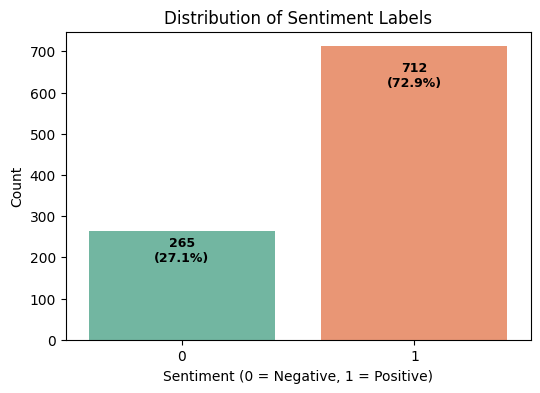

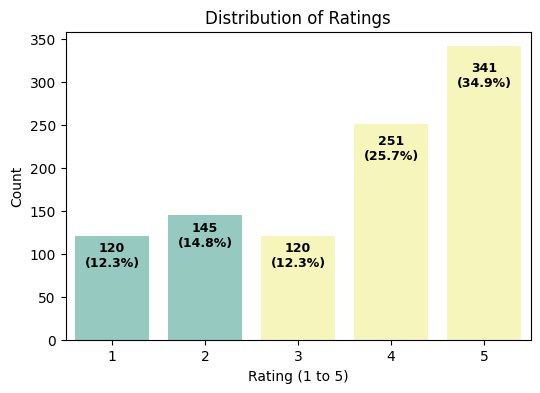

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def add_labels_inside(ax, total_counts):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            count = int(height)
            percentage = (height / total_counts) * 100
            x = p.get_x() + p.get_width() / 2
            y = height - (0.05 * height)
            ax.text(x, y, f'{count}\n({percentage:.1f}%)', 
                    ha='center', va='top', fontsize=9, color='black', fontweight='bold')

# Histogram for Sentiment Label
plt.figure(figsize=(6, 4))
ax1 = sns.countplot(x='Sentiment Label', hue='Sentiment Label', data=df, palette='Set2', legend=False)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
total = len(df)
add_labels_inside(ax1, total)
plt.show()

# Histogram for Ratings
plt.figure(figsize=(6, 4))
ax2 = sns.countplot(x='Ratings', hue='Sentiment Label', data=df, palette='Set3', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Count')
total = len(df)
add_labels_inside(ax2, total)
plt.show()

#### Distribution Analysis

Histograms were used to visualise the distributions of Sentiment Label and Ratings. We can see that there is significant class imbalance between negative and positive sentiment, with negative feedback being represented less than half as much as positive feedback. Additionally, this can be seen in the distribution of Ratings, where we see a much higher presence of 4 and 5 scores vs 1, 2 and 3 scores, which indicates a high likelihood that Ratings are highly correlated with Sentiment Label.

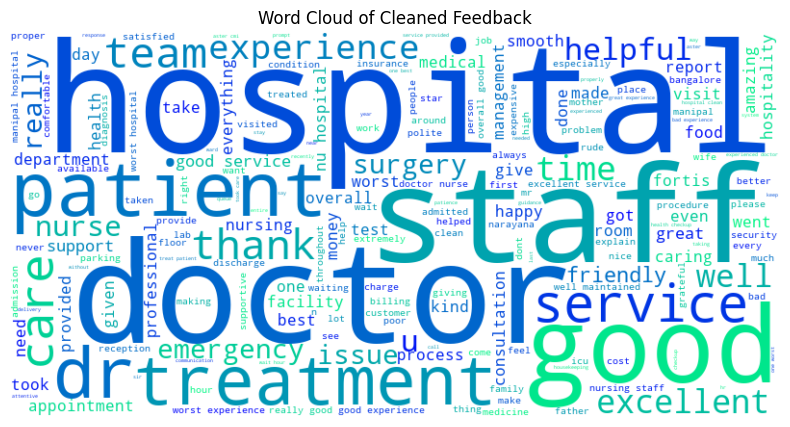

In [25]:
from wordcloud import WordCloud

# Combine all cleaned feedback into a single string
text = ' '.join(df['Cleaned_Feedback'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Feedback')
plt.show()

#### Visual Inspection of Cleaned Feedback

A word cloud was used to provide a quick visual overview of the most common themes and keywords present in the `Cleaned_Feedback` column. Prominent terms such as *"doctor"*, *"staff"*, and *"hospital"* suggest that much of the feedback is centred around medical personnel and healthcare services. Additionally, the presence of positive words like *"friendly"*, *"excellent"*, and *"helpful"* aligns with the overall sentiment distribution of the dataset, which contains a majority of positive reviews. Despite this, some less frequent but still visible negative terms such as *"worst"*, *"issue"*, and *"problem"* can also be observed, indicating that negative experiences are present, though less dominant.

---


## Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Use cleaned feedback as input
texts = df['Cleaned_Feedback'].dropna()

# Convert to document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(texts)

# Choose number of topics
n_topics = 4

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Interpret topics
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx}:")
        top_words = [feature_names[i] for i in topic.argsort()[-no_top_words:][::-1]]
        print(", ".join(top_words))

# Show top 20 words per topic
display_topics(lda_model, vectorizer.get_feature_names_out(), 20)

# Assign dominant topic to each document(feedback)
topic_values = lda_model.transform(dtm)
df['Dominant_Topic'] = topic_values.argmax(axis=1)

# Display the first few rows with the dominant topic
df.head(5)


Topic 0:
doctor, staff, patient, worst, hospital, experience, appointment, wait, time, management, money, good, treatment, helpful, went, hour, bad, consultation, dont, health

Topic 1:
dr, doctor, treatment, staff, good, service, thanks, team, experience, nurse, nursing, care, excellent, caring, hospital, surgery, amazing, happy, helped, emergency

Topic 2:
hospital, good, service, staff, doctor, patient, experience, care, excellent, treatment, nurse, nu, great, worst, best, facility, overall, emergency, team, really

Topic 3:
staff, really, report, patient, issue, lot, good, time, health, medicine, care, service, rude, parking, gave, got, come, team, professional, communication


,Feedback,Sentiment Label,Ratings,Cleaned_Feedback,Dominant_Topic
0,Good and clean hospital. There is great team o...,1,5,good clean hospital great team doctor good ot ...,2
1,Had a really bad experience during discharge. ...,1,5,really bad experience discharge need sensitive...,0
2,I have visited to take my second dose and Proc...,1,4,visited take second dose process really smooth...,3
3,That person was slightly clueless and offered...,1,3,person slightly clueless offered one package g...,3
4,There is great team of doctors and good OT fac...,0,1,great team doctor good ot facility,2


#### LDA Model Training Summary

Latent Dirichlet Allocation (LDA) was used to find common themes in the customer feedback data. The Cleaned_Feedback column was first transformed into a document-term matrix using CountVectorizer, which removed common English stopwords and ignored very rare or very frequent words to reduce noise (max_df=0.95, min_df=2). LDA was then applied with 4 topics, which was chosen to give a manageable number of clear, interpretable themes.

For each topic, the top 20 keywords were listed to help understand what the topic is about. Each feedback entry was assigned a dominant topic, based on the topic with the highest probability in that document. This made it possible to group reviews by topic and explore patterns such as average rating and sentiment for each group.

The results helped identify key themes in the feedback, including positive experiences with staff and service, as well as common complaints such as waiting times or poor communication. Grouping the feedback in this way gives useful insight into what customers value and where improvements may be needed.

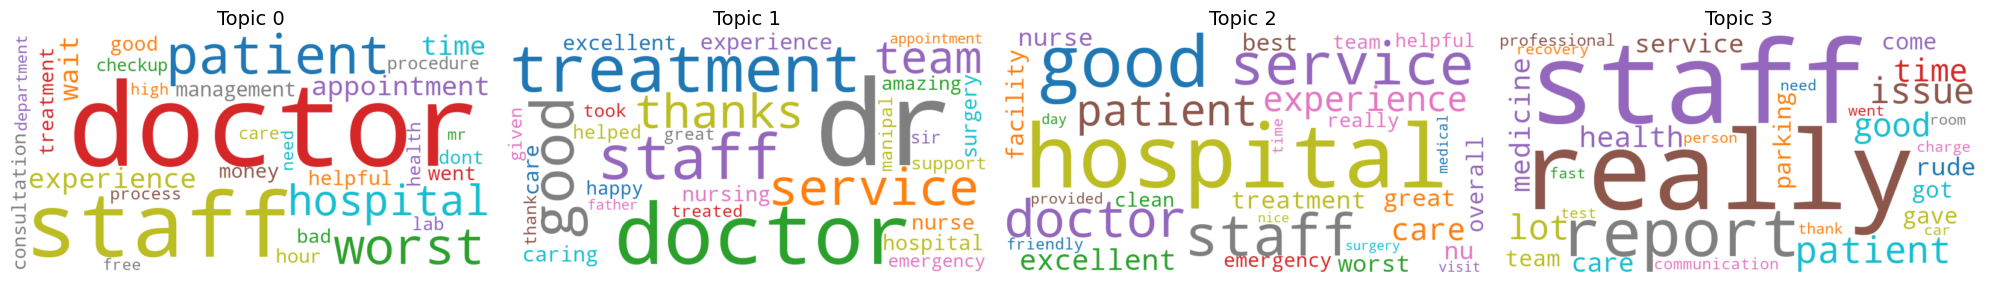

,Feedback Count,% Positive,% Negative,Avg Rating,1,2,3,4,5
Dominant_Topic,,,,,,,,,
0,195,52.3,47.7,2.85,38 (19.5%),55 (28.2%),38 (19.5%),27 (13.8%),37 (19.0%)
1,229,83.4,16.6,4.03,16 (7.0%),22 (9.6%),10 (4.4%),73 (31.9%),108 (47.2%)
2,447,78.3,21.7,3.70,48 (10.7%),49 (11.0%),53 (11.9%),136 (30.4%),161 (36.0%)
3,106,65.1,34.9,3.28,18 (17.0%),19 (17.9%),19 (17.9%),15 (14.2%),35 (33.0%)


In [27]:
from wordcloud import WordCloud

# Get the words for each topic
feature_names = vectorizer.get_feature_names_out()
n_topics = lda_model.n_components

# Create subplots
fig, axes = plt.subplots(1, n_topics, figsize=(20, 5), sharex=True, sharey=True)

for idx, topic_weights in enumerate(lda_model.components_):
    top_words_dict = {feature_names[i]: topic_weights[i] for i in topic_weights.argsort()[-30:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(top_words_dict)

    # Plot each WordCloud
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f"Topic {idx}", fontsize=14)

plt.tight_layout()
plt.show()

# Calculate the total number of reviews per topic
total_per_topic = df.groupby('Dominant_Topic').size()

# Create a pivot table for Ratings (1 to 5)
ratings_pivot = df.pivot_table(
    index='Dominant_Topic',
    columns='Ratings',
    aggfunc='size',
    fill_value=0
)

# Calculate percentage per rating level
ratings_percent = ratings_pivot.div(ratings_pivot.sum(axis=1), axis=0).round(3) * 100

# Combine count and percentage into one string per rating level
formatted_ratings = ratings_pivot.astype(str) + ' (' + ratings_percent.round(1).astype(str) + '%)'

# Add sentiment and rating summary
sentiment_summary = df.groupby('Dominant_Topic')['Sentiment Label'].agg(['sum', 'count'])
sentiment_summary['% Positive'] = (sentiment_summary['sum'] / sentiment_summary['count'] * 100).round(1)
sentiment_summary['% Negative'] = 100 - sentiment_summary['% Positive']
sentiment_summary = sentiment_summary.rename(columns={'count': 'Feedback Count'})

# Add average rating per topic
avg_rating = df.groupby('Dominant_Topic')['Ratings'].mean().round(2)

# Combine everything
topic_summary = pd.concat([sentiment_summary[['Feedback Count', '% Positive', '% Negative']], avg_rating, formatted_ratings], axis=1)
topic_summary = topic_summary.rename(columns={'Ratings': 'Avg Rating'})

# Display neatly
pd.set_option('display.max_columns', None)
display(topic_summary)

#### Interpretation of Topics

To interpret the LDA-generated topics, several steps were taken to provide both visual and numerical insight. Word clouds were created for each topic using the top keywords, helping to visually highlight dominant themes. Then, topic-level summaries were generated, showing feedback counts, sentiment proportions, average ratings, and the distribution of star ratings. This combination of visual and tabular data allows for clearer understanding of the concerns and sentiments associated with each topic.

| **Topic** | **Theme** | **Top Words** | **Sentiment** | **Avg Rating** | **Rating Spread** | **Interpretation**| **Insights** |
|-|-|-|-|-|-|-|-|
| **0**     | Frustration and Poor Experience    | doctor, staff, patient, worst, appointment, wait, bad, hour, consultation, money | 52.3% positive / 47.7% negative | 2.85           | 67.2% in 1–3 stars              | Reviews mention delays, poor service, and dissatisfaction with consultations and value.                    | Waiting times and administrative coordination need improvement. |
| **1**     | Exceptional Clinical Care          | dr, doctor, treatment, care, thanks, nurse, surgery, excellent, happy, amazing   | 83.4% positive (strongest)      | 4.03           | \~80% in 4–5 stars              | Highly positive feedback on doctors, nurses, and successful treatments; emotionally impactful experiences. | Reflects best-in-class healthcare delivery.                     |
| **2**     | General Satisfaction with Hospital | hospital, service, doctor, patient, excellent, care, team, facility              | 78.3% positive                  | 3.70           | Even spread, leaning 4–5 stars  | Captures overall trust and satisfaction with hospital quality, without intense emotion.                    | General praise; a broader, less specific version of Topic 1.    |
| **3**     | Communication & Process Issues     | staff, really, report, issue, time, rude, parking, communication, health         | 65.1% positive                  | 3.28           | Mixed, slight lean to 4–5 stars | Highlights non-clinical issues like rude staff, parking trouble, and poor communication.                   | Signals service delivery and interpersonal issues.              |

**Topic Quality Summary**

* **Separation**: Topics are well-separated across clinical, logistical, and interpersonal concerns.
* **Number of Topics**: 4 is appropriate for ~1000 reviews as more topics risk diluting meaning; fewer may merge distinct issues.
* **Emerging Themes**: Praise for doctors and care (Topics 1 & 2); dissatisfaction with process and support (Topics 0 & 3).

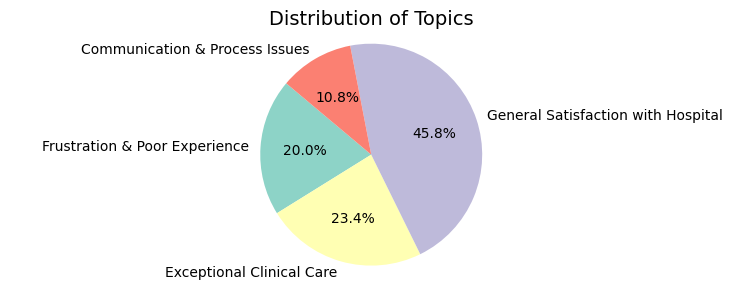

In [28]:
# Define the theme labels based on interpretation
topic_labels = {
    0: "Frustration & Poor Experience",
    1: "Exceptional Clinical Care",
    2: "General Satisfaction with Hospital",
    3: "Communication & Process Issues"
}

# Count how many feedback entries are assigned to each topic
topic_counts = df['Dominant_Topic'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 3))
plt.pie(
    topic_counts,
    labels=[topic_labels[i] for i in topic_counts.index],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Distribution of Topics", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Interpretation of Topic Distribution

The topic distribution shows that most reviews are positive, with General Satisfaction with Hospital (45.8%) and Exceptional Clinical Care (23.4%) making up nearly 70% of the feedback. This aligns with what we know about the dataset, which has a strong majority of positive sentiment and high ratings. However, Frustration & Poor Experience (20%) and Communication & Process Issues (10.8%) still represent a notable share of concerns, mostly around delays, staff behaviour, and service delivery—highlighting key areas for improvement despite overall positive experiences.

#### Alignment Between Topic Distribution and Sentiment Balance

The distribution of topics derived from LDA closely reflects the known sentiment balance of the dataset, which consists of approximately 70% positive and 30% negative feedback. Topics representing positive experiences - such as **General Satisfaction with Hospital** (45.8%) and **Exceptional Clinical Care** (23.4%) - together account for around 69.2% of the dataset. In contrast, themes associated with negative experiences - **Frustration & Poor Experience** (20%) and **Communication & Process Issues** (10.8%)- make up the remaining 30.8%. This close alignment suggests that the topic modelling process has effectively captured the underlying sentiment structure of the reviews, reinforcing the validity and coherence of the identified themes.

---

## Sentiment Analysis

Accuracy: 0.8061
Precision: 0.8398
Recall: 0.9065
F1 Score: 0.8719
ROC AUC Score: 0.8575

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        80
           1       0.84      0.91      0.87       214

    accuracy                           0.81       294
   macro avg       0.76      0.72      0.74       294
weighted avg       0.80      0.81      0.80       294



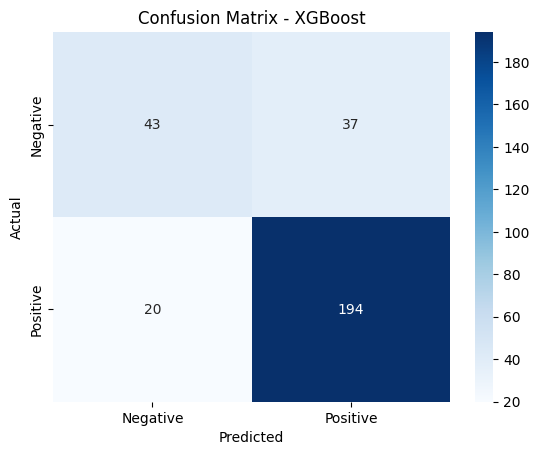

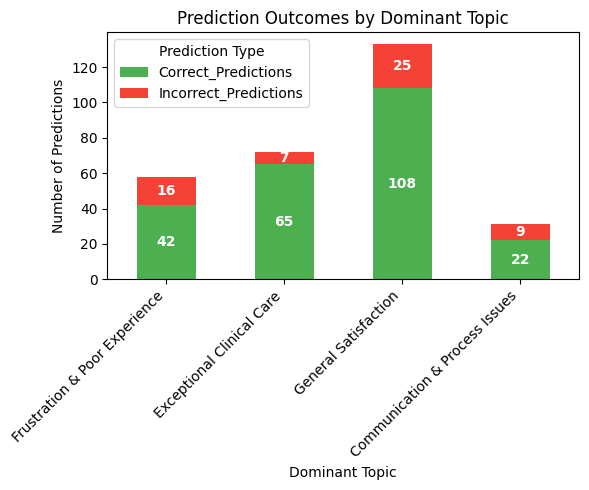

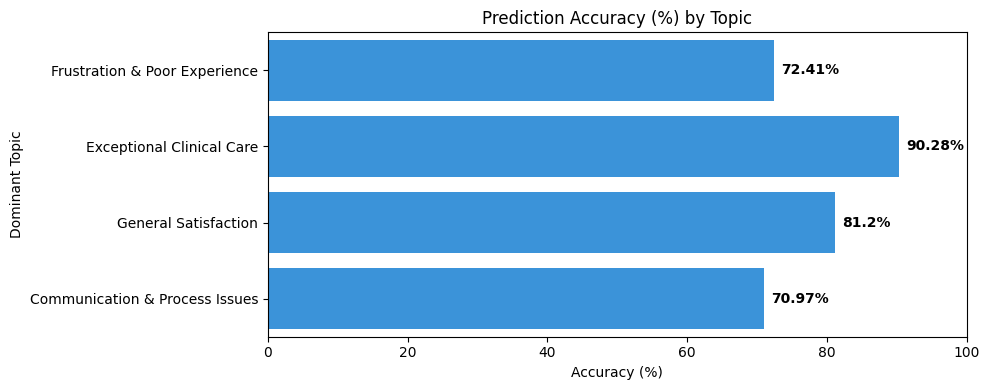

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


# Features and labels
X = df['Cleaned_Feedback']  # Input text
y = df['Sentiment Label']   # Target: 0 = negative, 1 = positive

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# VISUAL STUFF

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Create a test DataFrame with actual, predicted, and topic info
test_results = df.loc[y_test.index].copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred
test_results['Correct'] = test_results['Actual'] == test_results['Predicted']

# Group by Dominant_Topic and calculate metrics
topic_eval = test_results.groupby('Dominant_Topic')['Correct'].agg(
    Correct_Predictions='sum',
    Total='count'
)
topic_eval['Incorrect_Predictions'] = topic_eval['Total'] - topic_eval['Correct_Predictions']
topic_eval['Accuracy (%)'] = (topic_eval['Correct_Predictions'] / topic_eval['Total'] * 100).round(2)

# Map topic numbers to names
topic_names = {
    0: "Frustration & Poor Experience",
    1: "Exceptional Clinical Care",
    2: "General Satisfaction",
    3: "Communication & Process Issues"
}
topic_eval = topic_eval.rename(index=topic_names)

# Stacked Bar Chart – Correct vs Incorrect (with counts)
ax1 = topic_eval[['Correct_Predictions', 'Incorrect_Predictions']].plot(
    kind='bar',
    stacked=True,
    figsize=(6, 5),
    color=['#4CAF50', '#F44336']
)
plt.title('Prediction Outcomes by Dominant Topic')
plt.ylabel('Number of Predictions')
plt.xlabel('Dominant Topic')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prediction Type')

# Annotate each stacked bar
for idx, (correct, incorrect) in enumerate(zip(topic_eval['Correct_Predictions'], topic_eval['Incorrect_Predictions'])):
    ax1.text(idx, correct / 2, str(correct), ha='center', va='center', color='white', fontweight='bold')
    ax1.text(idx, correct + (incorrect / 2), str(incorrect), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Horizontal Bar Chart – Accuracy by Topic (with percentages)
plt.figure(figsize=(10, 4))
ax2 = sns.barplot(
    x='Accuracy (%)',
    y=topic_eval.index,
    data=topic_eval.reset_index(),
    color='#2196F3'
)
plt.title('Prediction Accuracy (%) by Topic')
plt.xlabel('Accuracy (%)')
plt.ylabel('Dominant Topic')
plt.xlim(0, 100)

# Annotate each bar with accuracy %
for i, acc in enumerate(topic_eval['Accuracy (%)']):
    ax2.text(acc + 1, i, f"{acc}%", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

#### Sentiment Analysis Model Training Summary

An XGBoost classifier was trained to perform binary sentiment classification (positive vs negative) on the pre-processed hospital review data. The textual feedback was first vectorised using TF-IDF, capturing important word features while reducing noise. A stratified train-test split (70:30) ensured that both positive and negative sentiments were proportionally represented in each set.

#### Model Evaluation

The sentiment analysis model shows strong overall performance, with an accuracy of 80.6%, precision of 83.98%, recall of 90.65%, and an F1 score of 87.19%. The high recall and F1 score for the positive class (1) indicate the model is effective at correctly identifying positive feedback. The ROC AUC score of 85.75% further suggests that the model has solid discriminative power overall.

However, a closer look at the confusion matrix and class-specific metrics reveals a significant issue: the model struggles with identifying negative feedback (class 0). Out of 80 actual negative reviews, only 43 were correctly classified, while 37 were incorrectly predicted as positive (false positives). This leads to a recall of just 54% for the negative class, meaning nearly half of the negative feedback goes undetected.

This imbalance is critical in a healthcare context, where identifying negative experiences is especially valuable for service improvement. The model’s tendency to misclassify negative reviews stems in part from the dataset’s inherent class imbalance - with positive feedback being far more frequent than negative. The weighted average scores, while high, can therefore obscure performance issues on the minority class.

To better understand model performance, prediction accuracy across the four dominant topics were analysed. The model performed best on Topic 1 ("Exceptional Clinical Care") and Topic 2 ("General Satisfaction with Hospital"), achieving 90.28% and 81.20% accuracy respectively, likely due to their clear and consistent positive language. In contrast, Topic 0 ("Frustration and Poor Experience") and Topic 3 ("Communication & Process Issues") saw lower accuracies (72.41% and 70.97%), reflecting the challenges of classifying more complex or mixed feedback. These differences highlight the model’s stronger performance on positive sentiment and its limitations in handling subtler, critical reviews.


Negative: 265, Positive: 712, Scale weight: 0.37
Accuracy: 0.7789
Precision: 0.8782
Recall: 0.8084
F1 Score: 0.8418
ROC AUC Score: 0.8405

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.63        80
           1       0.88      0.81      0.84       214

    accuracy                           0.78       294
   macro avg       0.73      0.75      0.74       294
weighted avg       0.80      0.78      0.78       294



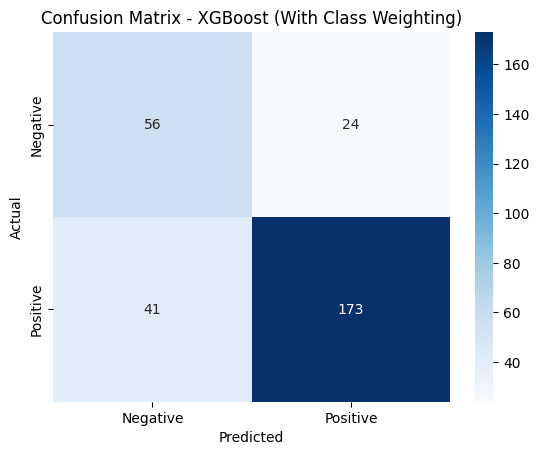

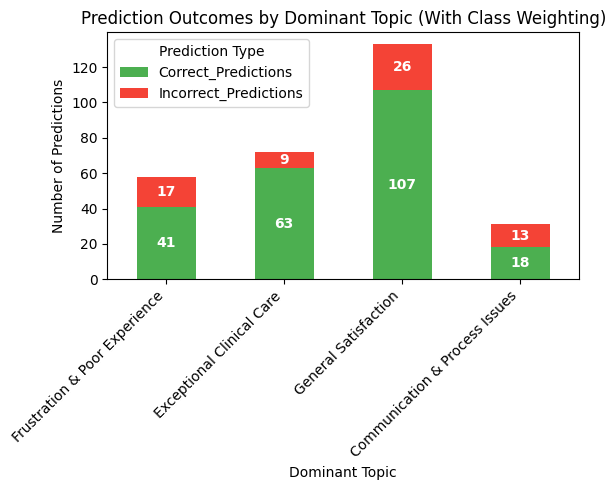

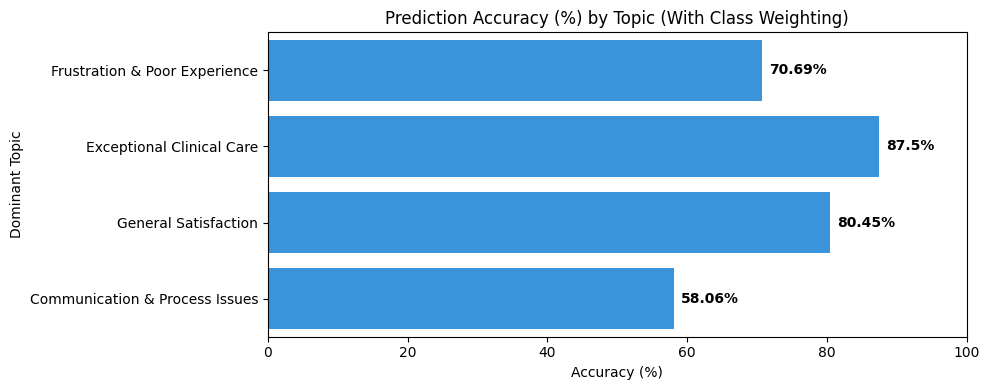

In [ ]:
# Features and labels
X = df['Cleaned_Feedback']  # Input text
y = df['Sentiment Label']   # Target: 0 = negative, 1 = positive

# Calculate scale_pos_weight
neg, pos = (y == 0).sum(), (y == 1).sum()
scale_weight = neg / pos
print(f"Negative: {neg}, Positive: {pos}, Scale weight: {scale_weight:.2f}")

# TF-IDF vectorisation
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost classifier with class weight
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (With Class Weighting)')
plt.show()

# Create a test DataFrame with actual, predicted, and topic info
test_results = df.loc[y_test.index].copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred
test_results['Correct'] = test_results['Actual'] == test_results['Predicted']

# Group by Dominant_Topic and calculate metrics
topic_eval = test_results.groupby('Dominant_Topic')['Correct'].agg(
    Correct_Predictions='sum',
    Total='count'
)
topic_eval['Incorrect_Predictions'] = topic_eval['Total'] - topic_eval['Correct_Predictions']
topic_eval['Accuracy (%)'] = (topic_eval['Correct_Predictions'] / topic_eval['Total'] * 100).round(2)

# Map topic numbers to names
topic_names = {
    0: "Frustration & Poor Experience",
    1: "Exceptional Clinical Care",
    2: "General Satisfaction",
    3: "Communication & Process Issues"
}
topic_eval = topic_eval.rename(index=topic_names)

# Stacked Bar Chart – Correct vs Incorrect (with counts)
ax1 = topic_eval[['Correct_Predictions', 'Incorrect_Predictions']].plot(
    kind='bar',
    stacked=True,
    figsize=(6, 5),
    color=['#4CAF50', '#F44336']
)
plt.title('Prediction Outcomes by Dominant Topic (With Class Weighting)')
plt.ylabel('Number of Predictions')
plt.xlabel('Dominant Topic')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prediction Type')

# Annotate each stacked bar
for idx, (correct, incorrect) in enumerate(zip(topic_eval['Correct_Predictions'], topic_eval['Incorrect_Predictions'])):
    ax1.text(idx, correct / 2, str(correct), ha='center', va='center', color='white', fontweight='bold')
    ax1.text(idx, correct + (incorrect / 2), str(incorrect), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Horizontal Bar Chart – Accuracy by Topic (with percentages)
plt.figure(figsize=(10, 4))
ax2 = sns.barplot(
    x='Accuracy (%)',
    y=topic_eval.index,
    data=topic_eval.reset_index(),
    color='#2196F3'
)
plt.title('Prediction Accuracy (%) by Topic (With Class Weighting)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Dominant Topic')
plt.xlim(0, 100)

# Annotate each bar with accuracy %
for i, acc in enumerate(topic_eval['Accuracy (%)']):
    ax2.text(acc + 1, i, f"{acc}%", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


#### Sentiment Analysis Model Retraining with Class Weighting

In this version of the sentiment analysis model, class weighting was introduced to address the imbalance between positive and negative feedback in the dataset. The dataset was found to have significantly more positive reviews than negative ones, which can bias the model toward overpredicting the majority class as was seen in the previous version. To compensate for this, the `scale_pos_weight` parameter in the XGBoost classifier was set based on the ratio of negative to positive samples. Specifically, this value was calculated using the formula:

$$
\text{scale\_pos\_weight} = \frac{\text{negative class count}}{\text{positive class count}}
$$

This adjustment rebalances the loss function during training, encouraging the model to place greater emphasis on correctly identifying the minority (negative) class. The goal of this step is not necessarily to increase overall accuracy, but to produce a model that is more fair and attentive to underrepresented negative feedback, which is often crucial in applications like healthcare review analysis.

#### Model Evaluation (Implemented Class Weighting)

After applying class weighting to address the class imbalance (265 negative vs. 712 positive reviews), the model achieved 77.9% accuracy, 87.8% precision, 80.8% recall, 84.2% F1 score, and an ROC AUC of 84.1%. Compared to the unweighted model (80.6% accuracy), this approach improved the model’s sensitivity to negative feedback, recall for the negative class increased from 54% to 70%, and true negatives rose from 43 to 56. However, this came with a trade-off: true positives decreased, and overall accuracy slightly dropped.

Topic-level accuracy declined slightly across the board, most notably for Topic 3 ("Communication & Process Issues"), which dropped from 71% to 58%, indicating that weighting may have introduced more confusion in nuanced or mixed-feedback cases.

In summary, while class weighting improved fairness by reducing false positives and enhancing detection of negative sentiment, it slightly compromised general performance. In the case where we need to perform this type of analysis on feedback from Hello Peter, we have ratings to work with, and thus the next step that will be taken to improve performance will be to include the `Ratings` feature in the model.

Negative: 265, Positive: 712, Scale weight: 0.37
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00       214

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



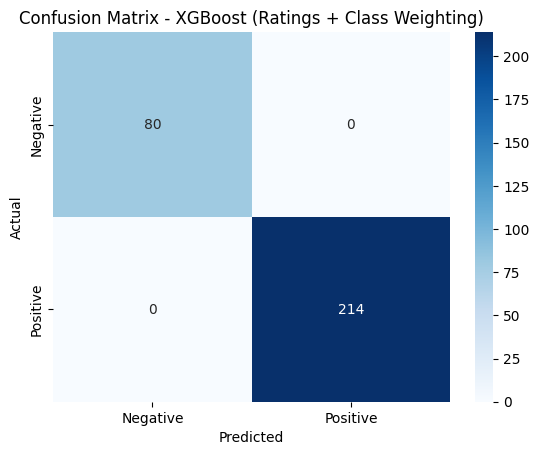

In [ ]:
from scipy.sparse import hstack

# Features and labels
X_text = df['Cleaned_Feedback']  # Input text
X_ratings = df['Ratings'].values.reshape(-1, 1)  # Ratings as numeric feature
y = df['Sentiment Label']   # Target: 0 = negative, 1 = positive

# Calculate scale_pos_weight
neg, pos = (y == 0).sum(), (y == 1).sum()
scale_weight = neg / pos
print(f"Negative: {neg}, Positive: {pos}, Scale weight: {scale_weight:.2f}")

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf.fit_transform(X_text)

# Combine TF-IDF features with Ratings
# Ratings are dense; TF-IDF is sparse, so I used hstack from scipy.sparse
X_combined = hstack([X_tfidf, X_ratings])

# Train/test split (note: split combined features and y)
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.3, random_state=42, stratify=y
)

# Train XGBoost classifier with class weight
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (Ratings + Class Weighting)')
plt.show()


#### Incorporating Ratings to Improve Model Accuracy

Following the previous stages of model training using only text data, the next step in improving predictive performance was to include an additional feature — the numerical Ratings field. This decision was based on the goal of aligning the model with the real-world context of the Hello Peter platform, which includes both textual feedback and user-provided star ratings. Since this proof-of-concept dataset uses Google Maps reviews, which also include numerical ratings, it made practical and methodological sense to leverage that information during model training.

The ratings field provides valuable sentiment signals that complement the textual content. By combining TF-IDF features from the cleaned feedback with the corresponding rating values, the model can better capture the nuanced relationship between numerical satisfaction levels and expressed sentiment. This integrated approach allows the model to generalise more effectively, especially for future application to Hello Peter reviews where both text and ratings are available. This retraining step marks a deliberate shift toward building a more context-aware and accurate sentiment classifier, while still addressing class imbalance through weighted learning.

#### Model Evaluation (Implemented Ratings Feature)

After incorporating the ratings feature into the sentiment analysis model, the classifier achieved perfect scores across all evaluation metrics (Accuracy, Precision, Recall, F1 Score, and ROC AUC = 1.0). While this might seem like an ideal outcome, such flawless performance is extremely rare in real-world data science applications, especially with noisy, subjective data like customer reviews. This raises valid concerns about potential overfitting or feature dominance and in this case, the possibility that the ratings field alone is driving the predictions, rather than the textual feedback.

Given the very high correlation typically observed between user-provided ratings and sentiment (e.g., low stars often correspond with negative sentiment), it’s plausible that the model is relying heavily, or even entirely, on the ratings field to determine the sentiment label. This would undermine the value of the text analysis component and reduce the generalisability of the model, especially when applied to platforms or scenarios where ratings might be missing, inconsistent, or unreliable.

Negative: 265, Positive: 712, Scale weight: 0.37
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00       214

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



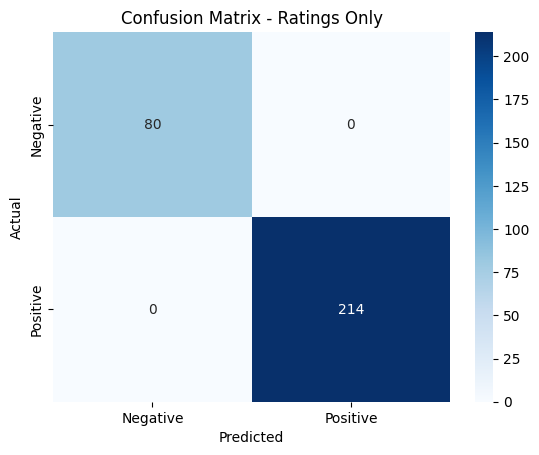

In [32]:
# Features and labels
X = df['Ratings'].values.reshape(-1, 1)  # Ratings as numeric feature
y = df['Sentiment Label']                # Target: 0 = negative, 1 = positive

# Calculate scale_pos_weight
neg, pos = (y == 0).sum(), (y == 1).sum()
scale_weight = neg / pos
print(f"Negative: {neg}, Positive: {pos}, Scale weight: {scale_weight:.2f}")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost classifier with class weight
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_weight, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ratings Only')
plt.show()

#### Conclusion: Ratings vs Feedback in Sentiment Classification

The results from the Ratings-only model (achieving perfect performance across all evaluation metrics) highlight a key insight: numerical ratings are highly predictive of sentiment labels, and in this dataset, they may serve as a clearer indicator of a customer’s emotional stance than the written feedback itself. While this level of accuracy is unlikely to generalise perfectly across all datasets, it strongly suggests that ratings alone often encapsulate the sentiment behind a review in a way that is easier for machine learning models to interpret.

In contrast, the textual feedback appears to play a more valuable role in uncovering *why* that sentiment exists, as demonstrated in the topic modelling section, where themes like clinical care, wait times, and communication breakdowns were extracted. Thus, feedback is better suited for thematic exploration and categorising concerns, whereas ratings are more efficient for sentiment classification within the bounds of this proof of concept.

These findings support a two-pronged approach to real-world feedback analysis: use *ratings* as the primary driver for automated sentiment detection, and rely on *feedback text* for qualitative insights and concern categorisation. In future applications, especially with larger and more diverse datasets, the integration of both inputs may yield more robust sentiment models, but for now, each source has a clearly distinct and complementary strength.

#### 

## References

Blei, D.M., Ng, A.Y. and Jordan, M.I., 2003. Latent Dirichlet Allocation. Journal of Machine Learning Research, 3.

Brownlee, J., 2020. How to configure XGBoost for imbalanced classification. Machine Learning Mastery. Available at: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/ (Accessed 25 June 2025). 

Byteplus, 2025. Benefits of latent Dirichlet allocation (LDA). Available at: https://www.byteplus.com/en/topic/401003?title=benefits-of-latent-dirichlet-allocation-lda (Accessed 25 June 2025). 

Chen, T. and Guestrin, C., 2016. Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).

Egger, R. and Yu, J., 2022. A topic modeling comparison between lda, nmf, top2vec, and bertopic to demystify twitter posts. Frontiers in sociology, 7, p.886498.

Goodfellow, I., Bengio, Y., Courville, A. and Bengio, Y., 2016. Deep learning (Vol. 1, No. 2). Cambridge: MIT press.

Saiwa, 2024. Xgboost Machine Learning | Everything You Need to Know. Available at: https://saiwa.ai/blog/xgboost-machine-learning/ (Accessed 25 June 2025).